# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 1. Dùng sklearn.datasets.make_circles để tạo ra 1000 điểm dữ liệu có dạng hình tròn với factor=0.1, noise=0.1.
- a) Thực hiện phân cụm bằng DBSCAN trong sklearn. Trực quan hoá và nhận xét.
- b) Điều chỉnh các tham số eps và min_samples khi phân cụm. Trực quan hoá và nhận xét. So sánh với K-means và GMM.
- c) Viết hàm DBSCAN_clustering(data, eps, minPts) để thực hiện phân cụm dựa trên mật độ cho tập dữ liệu data theo các bước sau:
    - Bước 1. Viết hàm classify_points(data, eps, minPts) để phân loại điểm nhân, điểm biên và điểm nhiễu trong tập dữ liệu;
    - Bước 2. Viết hàm density_reach(data, i, eps) để tìm danh sách các điểm density- reachable từ điểm thứ i trong data;
    - Bước 3. Sử dụng 2 hàm trên để viết hàm phân cụm.
- d) Sử dụng hàm DBSCAN_clustering vừa viết để phân cụm cho dữ liệu đã tạo từ đầu bài và so sánh với DBSCAN trong sklearn

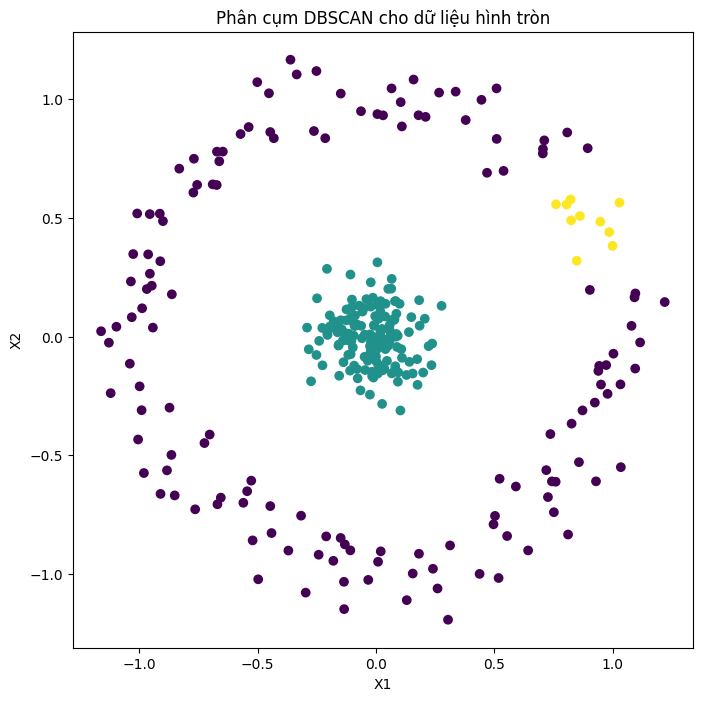

In [91]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Tạo dữ liệu hình tròn
np.random.seed(2)
X, labels_true = make_circles(n_samples=300, factor=0.1, noise=0.1)

# Phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Trực quan hóa kết quả
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', marker='o')
plt.title('Phân cụm DBSCAN cho dữ liệu hình tròn')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [90]:
labels

array([ 0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,
        1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,
        0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  0,
        0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1, -1,
        0,  1,  0,  1,  0

<center> Nhận xét </center>

Với tham số eps=0.2 trong DBSCAN, ta thấy rằng thuật toán đã nhóm các điểm dữ liệu chủ yếu thành 2 cụm chính. Min_samples là 5 có nghĩa là chỉ cần năm điểm gần nhau cũng được coi là một cụm, dẫn đến việc hầu hết các điểm đều được gán vào cụm thay vì bị coi là nhiễu.

eps=0.2 cho phép các điểm cách xa nhau hơn cũng có thể được coi là thuộc về cùng một cụm. Điều này giúp các điểm trở nên dễ dàng hơn trong việc liên kết với nhau, từ đó tạo nên cụm lớn hơn.

Trong trường hợp này, kết quả cho thấy các cụm đã được phân chia hầu như không có điểm nhiễu, điều này có thể không phản ánh chính xác cấu trúc thực sự của dữ liệu nếu các điểm thực sự không liên quan lại được gom chung. Điều này cũng chỉ ra rằng việc chọn tham số cẩn thận là rất quan trọng để đạt được kết quả phân cụm chính xác. ​

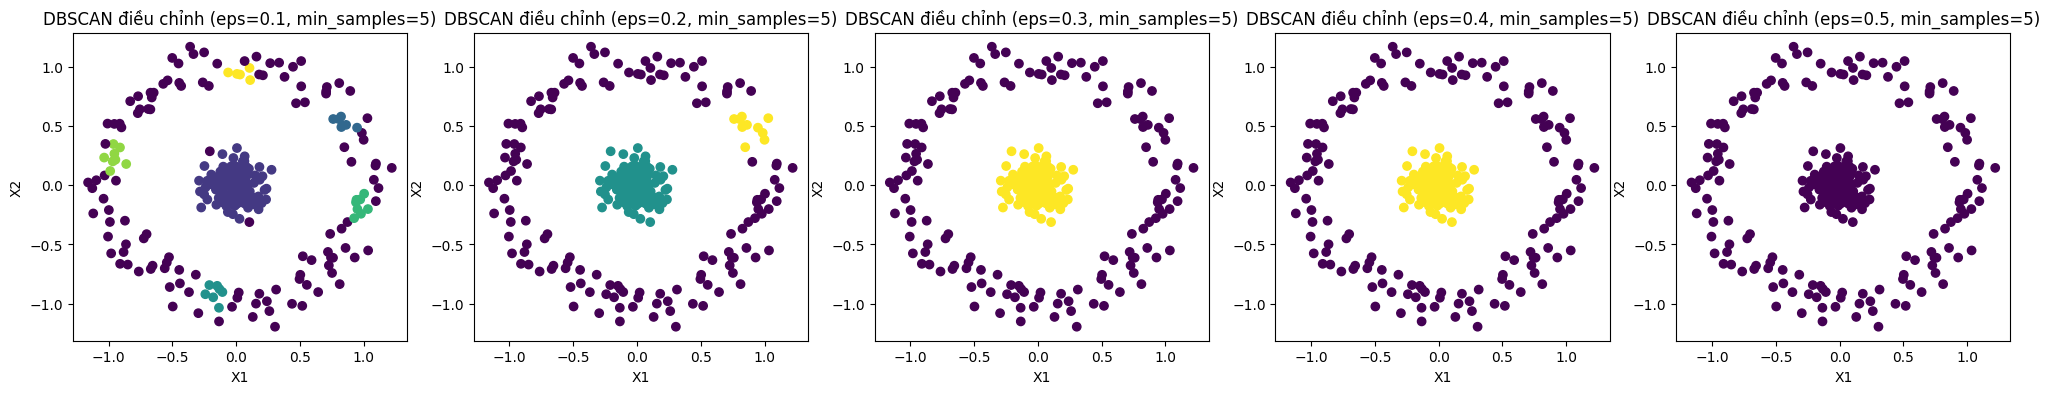

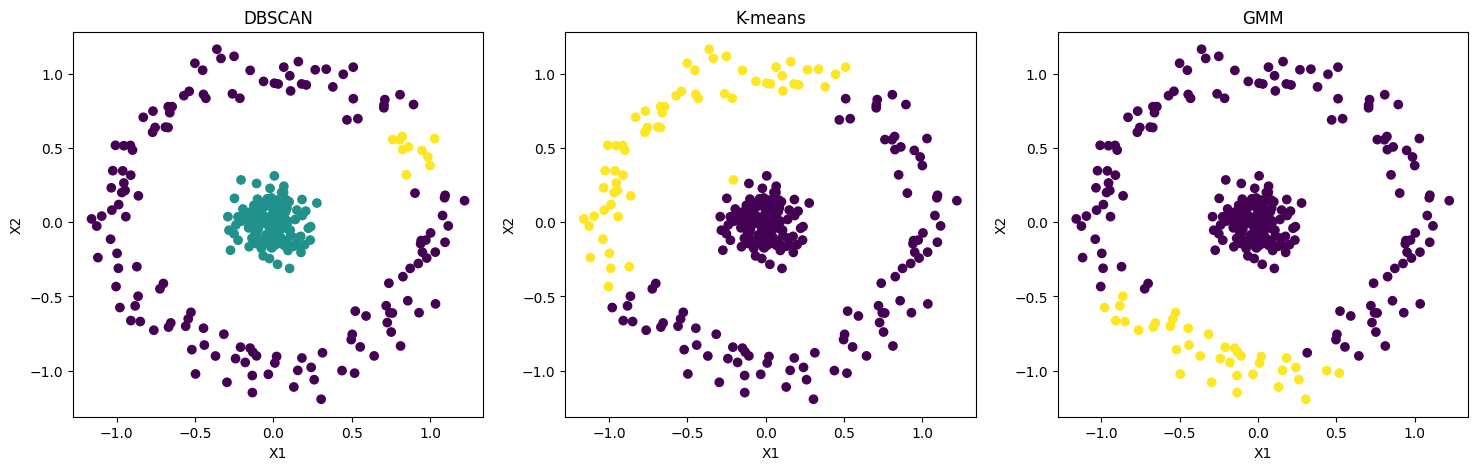

In [44]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Điều chỉnh các tham số DBSCAN
fig, axs = plt.subplots(1, 5, figsize=(25, 4))
for i in range(5):
    dbscan_adjusted = DBSCAN(eps=(i+1)/10, min_samples=5)
    labels_adjusted = dbscan_adjusted.fit_predict(X)
    axs[i].scatter(X[:,0], X[:,1], c=labels_adjusted, cmap='viridis', marker='o')
    axs[i].set_title('DBSCAN điều chỉnh (eps={0}, min_samples=5)'.format((i+1)/10))
    axs[i].set_xlabel('X1')
    axs[i].set_ylabel('X2')

plt.show()

# Phân cụm bằng DBSCAN
dbscan_adjusted = DBSCAN(eps=0.2, min_samples=5)
labels_adjusted = dbscan_adjusted.fit_predict(X)

# Phân cụm bằng K-means và GMM
kmeans = KMeans(n_clusters=2, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=2)
labels_gmm = gmm.fit_predict(X)

# Trực quan hóa so sánh
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X[:,0], X[:,1], c=labels_adjusted, cmap='viridis', marker='o')
axs[0].set_title('DBSCAN')
axs[1].scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='viridis', marker='o')
axs[1].set_title('K-means')
axs[2].scatter(X[:,0], X[:,1], c=labels_gmm, cmap='viridis', marker='o')
axs[2].set_title('GMM')
for ax in axs:
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
plt.show()


<center> Nhận xét </center>

#### **DBSCAN**
- DBSCAN là thuật toán phù hợp nhất với dữ liệu có cấu trúc không tuyến tính hoặc phức tạp như dữ liệu hình tròn đồng tâm. Với việc tăng eps và giảm min_samples, DBSCAN có khả năng liên kết các điểm trong cùng một cụm một cách hiệu quả hơn, giảm thiểu việc phân loại các điểm là nhiễu. Thuật toán này có thể xác định rõ ràng biên giới giữa các cụm với nhau một cách dựa trên mật độ, điều mà các thuật toán dựa trên khoảng cách trung tâm như K-means không thể làm được.
#### **K-means**
- K-means có xu hướng tìm các cụm dựa trên tâm cụm, làm cho nó thường chỉ thích hợp với dữ liệu có phân phối gần đồng đều hoặc hình cầu. Trong trường hợp của dữ liệu hình tròn đồng tâm, K-means sẽ khó có thể phân biệt được hai cụm một cách rõ ràng do nó cố gắng tối ưu hóa khoảng cách Euclidean từ mỗi điểm đến trung tâm cụm gần nhất.
#### **Gaussian Mixture Model (GMM)**
- GMM có thể coi là một sự cải tiến so với K-means vì nó không chỉ xem xét trung tâm cụm mà còn cả hình dạng của cụm thông qua ma trận covariance. GMM có khả năng thích ứng với cụm có hình dạng elip, nhưng nó vẫn có thể gặp khó khăn trong việc xác định chính xác biên giới giữa các cụm có mật độ tương đối đồng đều như trong trường hợp hình tròn đồng tâm.

**Kết Luận**
- DBSCAN là lựa chọn tốt nhất trong trường hợp này vì khả năng phát hiện cụm dựa trên mật độ, cho phép nó xử lý tốt các dữ liệu có cấu trúc phức tạp.
- K-means không phù hợp với cấu trúc dữ liệu hình tròn đồng tâm vì nó không thể phân biệt được biên giới cụm một cách rõ ràng.
- GMM tốt hơn K-means trong việc xử lý dữ liệu hình tròn nhưng không bằng DBSCAN khi đối mặt với dữ liệu có mật độ đồng đều.

In [45]:
def euclidean_distances(a, b):
    return (np.sqrt(np.sum(np.square(a - b))))

In [46]:
def distEuclidean_matrix(data):
    distEuclidean = np.zeros(shape=[data.shape[0],data.shape[0]])

    for i in range(distEuclidean.shape[0]):
        for j in range(distEuclidean.shape[1]):
            distEuclidean[i, j] = euclidean_distances(data[i], data[j])

    return distEuclidean

In [95]:
def classify_points(data, eps, minPts):
    distEuclidean = distEuclidean_matrix(data)

    core_points = []
    bordered_points = []
    noise_points = []

    check_points = np.empty(shape=[X.shape[0],X.shape[0]])
    check_points.fill(-1)

    for i in range(distEuclidean.shape[0]):
        for j in np.where(distEuclidean[i,:] <= eps):
            check_points[i, j] = 1

        check_points[i, i] = -1
        
    for i in range(distEuclidean.shape[0]):
        # Core points
        if np.count_nonzero(check_points[i,:] == 1) >= minPts:
            check_points[i, i] = 0
            core_points.append(data[i].tolist())

    for i in range(distEuclidean.shape[0]):
        # Border points
        if (check_points[i,i] == -1):
            if (np.any(check_points[np.where(check_points[i,:] == 1), np.where(check_points[i,:] == 1)] == 0) == True):
                bordered_points.append(data[i].tolist())
                check_points[i, i] = 1

    for i in range(distEuclidean.shape[0]):
        # Noise points
        if (check_points[i,i] == -1):
            noise_points.append(data[i].tolist())
                
    return np.array(core_points), np.array(bordered_points), np.array(noise_points), check_points


In [96]:
core_points, border_points, noise_points, _ = classify_points(data= X, eps= 0.2, minPts= 5)


In [97]:
core_points.shape

(266, 2)

In [98]:
border_points.shape

(33, 2)

In [99]:
noise_points.shape

(1, 2)

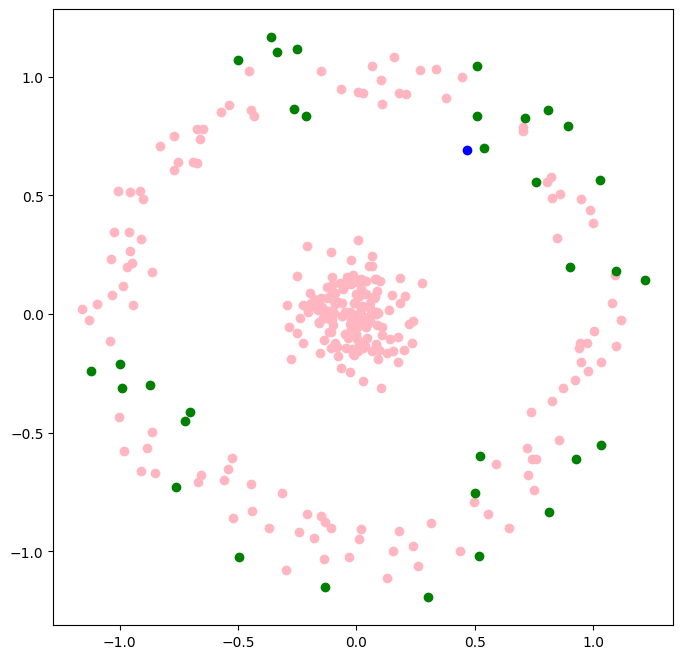

In [100]:
plt.figure(figsize=(8,8))

plt.subplot()
plt.scatter(core_points[:,0], core_points[:,1], marker='o', color='lightpink')
plt.scatter(border_points[:,0], border_points[:,1], marker='o', color='green')
plt.scatter(noise_points[:,0], noise_points[:,1], marker='o', color='blue')

In [53]:
def density_reach(i, diagonal_elements, check_points):
    diagonal_elements.flags.writeable = True
    density_reach = [i]
    change = True
    while (change == True):
        diagonal_elements_before = np.copy(diagonal_elements)
        if change == True:
            for j in np.where(check_points[i, :] == 1)[0]:
                density_reach.append(j)
                check_points[j,j] = 1
                diagonal_elements[j] = 1
        if np.array_equal(diagonal_elements_before, diagonal_elements):
            change = False

    return density_reach

In [54]:
def DBSCAN_Clustering(data, minPts, eps):
    distEuclidean = distEuclidean_matrix(data)

    core_points, border_points, noise_points, check_points = classify_points(data= X, eps= 0.2, minPts= 5)

    diagonal_elements = np.diagonal(check_points)
    diagonal_elements.flags.writeable = True
    change = False
    cluster = 0
    while (np.any(diagonal_elements == 0)):
        diagonal_elements_before = np.copy(diagonal_elements)
        if change == False:
            cluster = cluster + 1
        for i in range(diagonal_elements.shape[0]):
            if check_points[i, i] == cluster and change == True:
                for j in np.where(check_points[i, :] == 1)[0]:
                    if check_points[j, j] == 0:
                        change = True
                    check_points[j, j] = cluster
                    diagonal_elements[j] = cluster
            
            if check_points[i, i] == 0 and change == False:
                check_points[i, i] = cluster
                diagonal_elements[i] = cluster
                for j in np.where(check_points[i, :] == 1)[0]:
                    if check_points[j, j] == 0:
                        change = True
                    check_points[j, j] = cluster
                    diagonal_elements[j] = cluster
        if np.array_equal(diagonal_elements_before, diagonal_elements):
            change = False

    return diagonal_elements


In [92]:
cluster_matrix = DBSCAN_Clustering(data= X, eps= 0.2, minPts= 5)

In [93]:
cluster_matrix


array([1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2.,
       2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2.,
       1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2.,
       1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2.,
       1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
       2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 1.

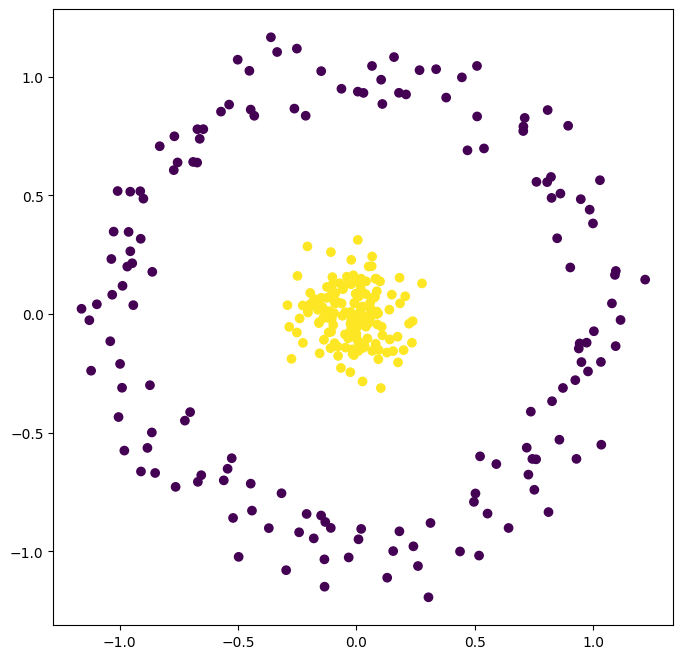

In [94]:
plt.figure(figsize=(8,8))

plt.subplot()
plt.scatter(X[:,0], X[:,1], marker='o', c=cluster_matrix)

<center> Nhận xét: </center>

- Có thể nhận thấy việc phân cụm đã hoạt động khá tốt.
- Nhìn chung thì tổng thể phân cụm giống như Sklearn.
- Tuy nhiên nếu xem xét kỹ có vẻ việc xác định điểm nhiễu vẫn còn 1 vài sai xót nhỏ, không giống hoàn toàn với yêu cầu.

------

## Bài 2. Dùng sklearn.datasets.make_moons để tạo ra 1000 điểm dữ liệu có dạng hình mặt trăng với noise=0.1.
- a) Thực hiện phân cụm bằng DBSCAN. Trực quan hoá và nhận xét.
- b) Điều chỉnh các tham số eps và min_samples để được kết quả thích hợp. Trực quan hoá và nhận xét.

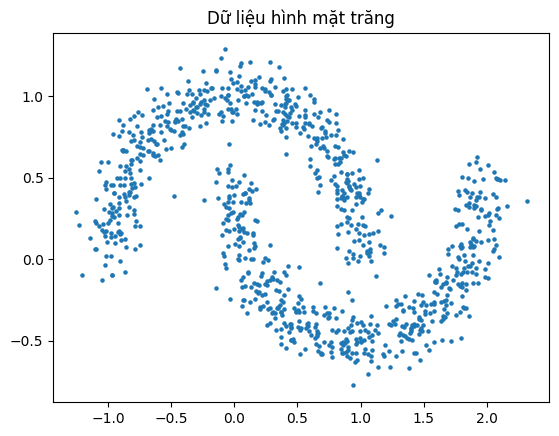

In [58]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Tạo dữ liệu
X, _ = make_moons(n_samples=1000, noise=0.1)

# Trực quan hoá dữ liệu
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title('Dữ liệu hình mặt trăng')
plt.show()


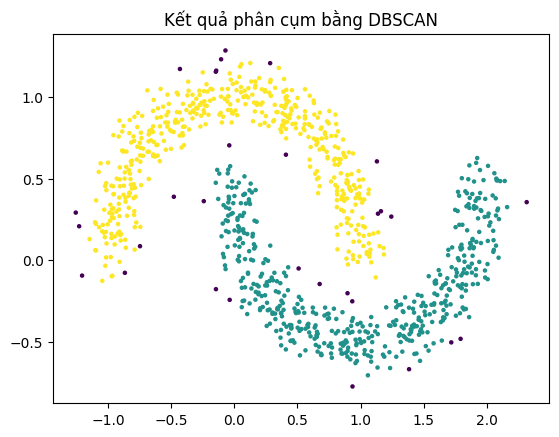

In [59]:
from sklearn.cluster import DBSCAN

# Thực hiện phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Trực quan hoá kết quả phân cụm
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng DBSCAN')
plt.show()


<center> Nhận xét </center>

- DBSCAN đã phân chia dữ liệu thành 2 cụm tương ứng với 2 hình mặt trăng.
- Các điểm dữ liệu trong từng cụm được phân tách rõ ràng, với những điểm gần nhau được nhóm lại thành một cụm.
- Các điểm nhiễu (outliers) nằm ngoài các cụm được xác định và đã được đánh dấu riêng biệt.

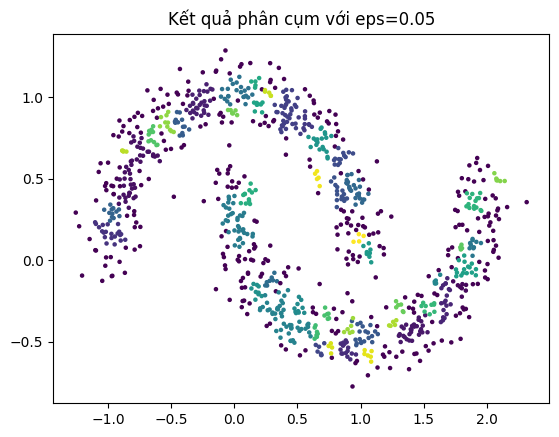

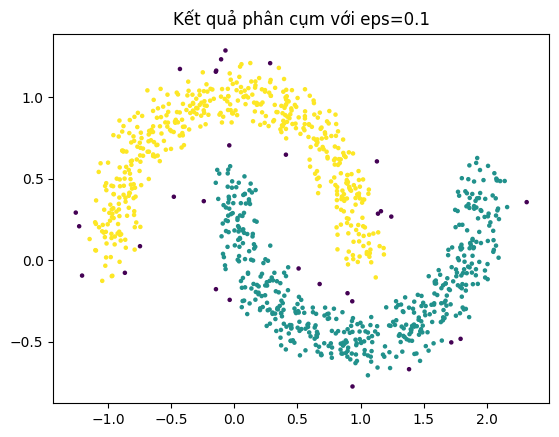

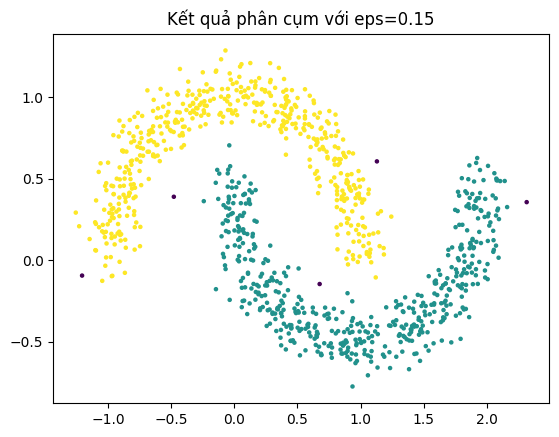

In [60]:
# Thực hiện phân cụm với eps khác nhau
eps_values = [0.05, 0.1, 0.15]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    
    # Trực quan hoá kết quả
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
    plt.title(f'Kết quả phân cụm với eps={eps}')
    plt.show()


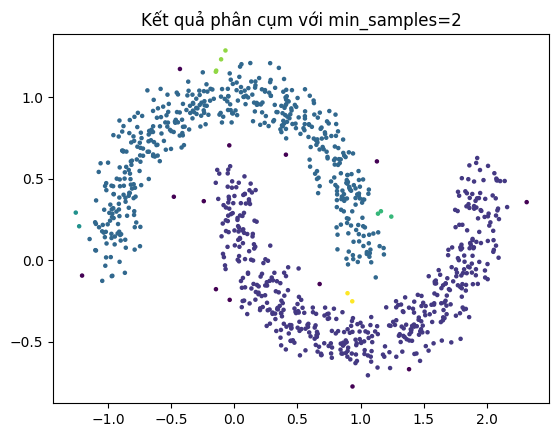

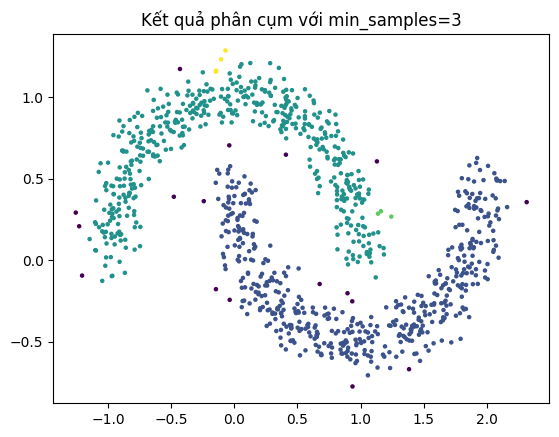

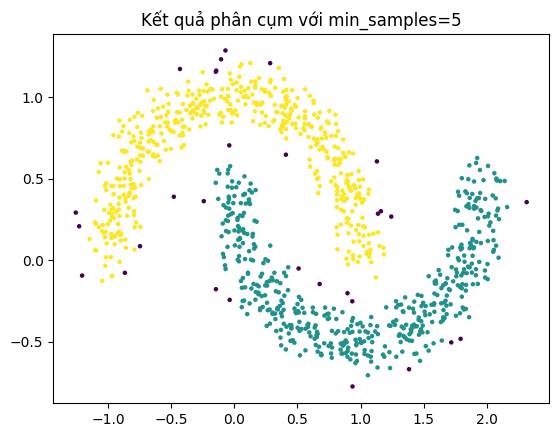

In [61]:
# Thực hiện phân cụm với min_samples khác nhau
min_samples_values = [2, 3, 5]
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.1, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Trực quan hoá kết quả
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
    plt.title(f'Kết quả phân cụm với min_samples={min_samples}')
    plt.show()


<center> Nhận xét: </center>

#### 1. Thay đổi tham số eps:
- eps = 0.05: Kết quả phân cụm không tốt, nhiều điểm dữ liệu bị xác định là nhiễu (nhãn -1), do đó chỉ có một số ít điểm tạo thành cụm và các cụm khá rời rạc, không làm rõ được mục đích phân cụm
- eps = 0.10: Kết quả phân cụm cải thiện, ít điểm bị xác định là nhiễu hơn, các cụm bắt đầu hình thành rõ ràng hơn thành 2 cụm chính
- eps = 0.15: 2 cụm chính đã bị hoà vào nhau. Nếu eps quá lớn, các cụm có thể bị hợp nhất và không chính xác.

#### 2. Thay đổi tham số min_samples:
- min_samples = 2: Số lượng điểm nhiễu ít hơn, nhiều điểm dữ liệu được xác định là thuộc về cụm hơn. Tuy nhiên, có thể có nhiều cụm nhỏ không chính xác.
- min_samples = 3: Cân bằng tốt hơn giữa số lượng cụm và số điểm nhiễu. Đây là giá trị mặc định phổ biến và cho kết quả tốt trong ví dụ này.
- min_samples = 5: Số lượng cụm giảm và số điểm nhiễu tăng lên, do yêu cầu số lượng điểm lân cận lớn hơn để tạo thành cụm.

#### Tổng kết:
- Tham số eps cần được chọn sao cho các điểm dữ liệu gần nhau có thể tạo thành cụm mà không gộp nhiều cụm nhỏ thành một cụm lớn.
- Tham số min_samples cần cân nhắc để tránh quá nhiều điểm bị xác định là nhiễu hoặc quá ít điểm để tạo thành các cụm nhỏ không ý nghĩa.
- Điều chỉnh cả hai tham số eps và min_samples sẽ giúp tối ưu hóa quá trình phân cụm và đạt kết quả tốt nhất cho dữ liệu cụ thể.

-----   

## Bài 3. Bộ dữ liệu shopping-data bao gồm các quan sát về giới tính, độ tuổi, thu nhập và điểm chi tiêu của 200 khách hàng. Ta cần phân cụm tập khách hàng này vào những nhóm có chung đặc tính và hành vi mua sắm để chăm sóc và phục vụ họ tốt hơn.
- a) Đọc dữ liệu và tiền xử lý dữ liệu.
- b) Với minPts = 11, hãy chọn ε thích hợp dựa vào biểu đồ k-distance.
- c) Với tham số đã chọn, thực hiện phân cụm bằng DBSCAN. Nhận xét.
- d) Phân cụm dữ liệu trên bằng K-means và GMM. So sánh kết quả với câu c.

In [62]:
import pandas as pd

# Đọc dữ liệu từ URL
url = 'https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv'
data = pd.read_csv(url)

# Xem qua dữ liệu
print(data.head())
print(data.info())
print(data.describe())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [63]:
# Kiểm tra và xử lý giá trị thiếu
print(data.isnull().sum())

# Không có giá trị thiếu, do đó không cần xử lý

# # Chuẩn hóa dữ liệu cho các cột
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


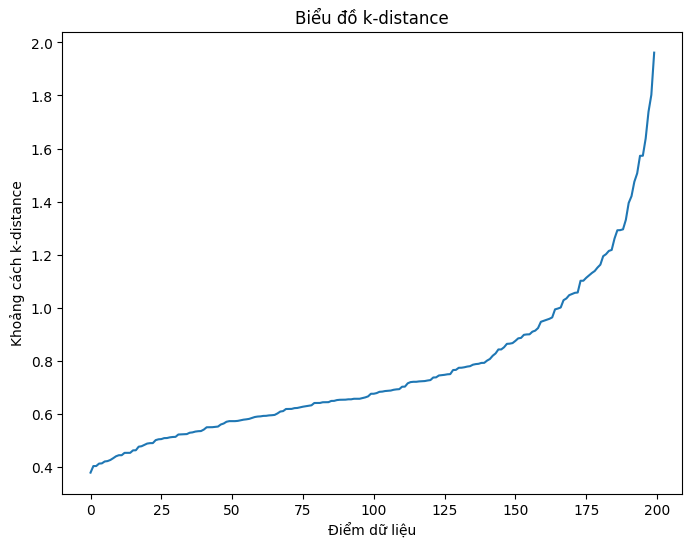

In [64]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Sử dụng NearestNeighbors để tìm khoảng cách k-distance
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sắp xếp khoảng cách
distances = np.sort(distances[:, 10], axis= 0)

# Vẽ biểu đồ k-distance
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Biểu đồ k-distance')
plt.xlabel('Điểm dữ liệu')
plt.ylabel('Khoảng cách k-distance')
plt.show()


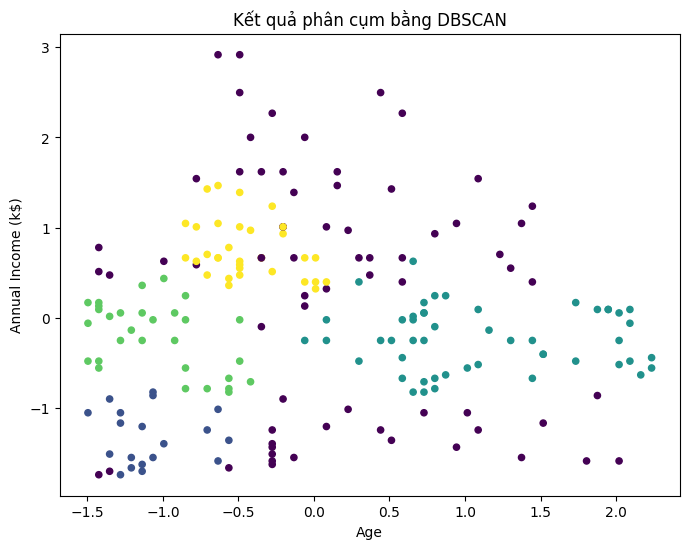

In [65]:
from sklearn.cluster import DBSCAN

# Phân cụm bằng DBSCAN với eps=0.65 và min_samples=11
dbscan = DBSCAN(eps=0.6, min_samples=11)
labels = dbscan.fit_predict(data_scaled)

# Trực quan hoá kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.title('Kết quả phân cụm bằng DBSCAN')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


<center> Nhận xét: </center>

- Với việc điều chỉnh trên có thể thấy ta hình thành được 4 cụm chính, nhưng còn khá nhiều điểm nhiễu.
- Hiệu quả phân cụm: DBSCAN không phân chia rõ ràng dữ liệu thành các cụm do dữ liệu này khá rời rạc, nhiều điểm nằm tách biệt nhau, dẫn đến việc khó hình thành các cụm.
- Điểm nhiễu: Phần lớn các điểm được xác định là điểm nhiễu (outliers). Điều này cho thấy rằng các điểm không đủ gần nhau để tạo thành một cụm với các tham số eps và min_samples đã chọn.
- Phân bố dữ liệu: Dữ liệu này có thể không phù hợp với DBSCAN nếu không có cụm mật độ cao. Trong các trường hợp như vậy, cần xem xét các thuật toán phân cụm khác hoặc điều chỉnh tham số.

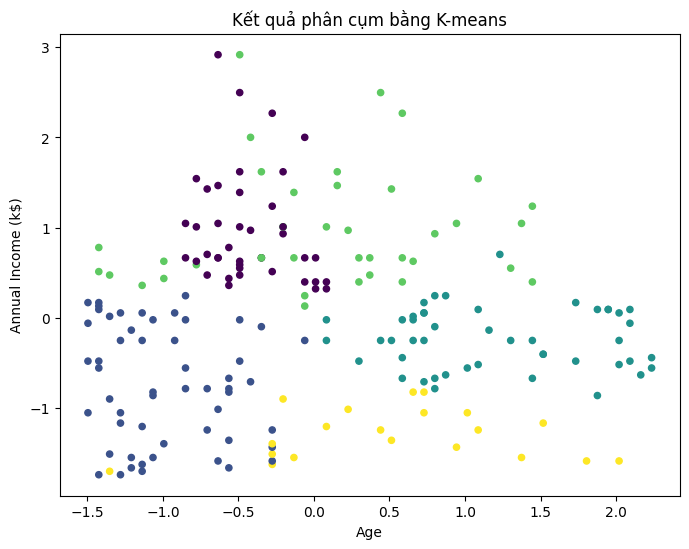

In [66]:
from sklearn.cluster import KMeans

# Phân cụm bằng K-means với k=5 (giả sử số cụm là 5)
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Trực quan hoá kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('Kết quả phân cụm bằng K-means')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


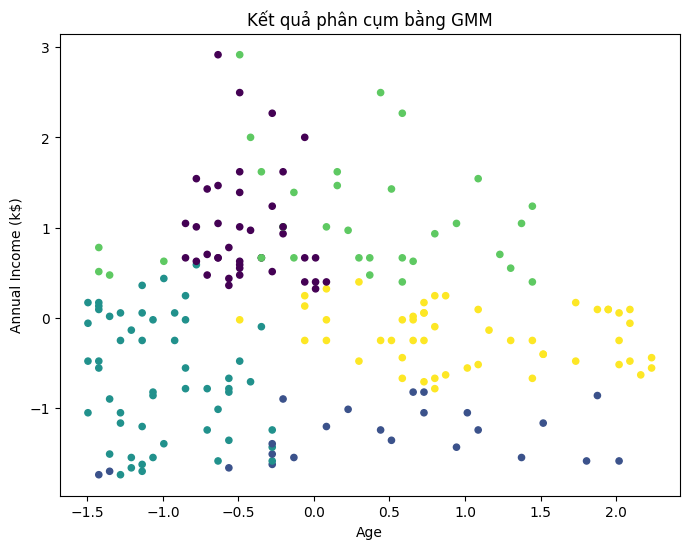

In [67]:
from sklearn.mixture import GaussianMixture

# Phân cụm bằng GMM với số cụm k=5
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(data_scaled)

# Trực quan hoá kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis', s=20)
plt.title('Kết quả phân cụm bằng GMM')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


<center> Nhận xét về K-means: </center>

- Trong ví dụ này số cụm k là 5.
- Hình dạng cụm: K-means giả định các cụm có hình dạng cầu nên ta nhận thấy việc phân cụm bị chồng chập lên nhau nhưng vẫn rõ hơn là DBSCAN
- Điểm nhiễu: K-means không xác định các điểm nhiễu (outliers). Mọi điểm dữ liệu đều được gán vào một cụm.
- Kết quả: K-means phân chia dữ liệu thành 5 cụm, mặc dù một số điểm dữ liệu có thể không thuộc về cụm tự nhiên của chúng.

<center> Nhận xét về GMM: </center>

- Xác định trước số cụm: GMM yêu cầu xác định trước số cụm (k), tương tự như K-means.
- Hình dạng cụm: GMM cho phép các cụm có hình dạng elip (elliptical clusters), linh hoạt hơn K-means trong việc xác định các cụm có hình dạng phức tạp.
- Xác suất: GMM gán mỗi điểm dữ liệu vào cụm dựa trên xác suất, cho phép một điểm có thể thuộc về nhiều cụm với các xác suất khác nhau.
- Điểm nhiễu: GMM cũng không xác định các điểm nhiễu, mọi điểm dữ liệu đều được gán vào một cụm.
- Kết quả: GMM có thể phân chia dữ liệu thành các cụm phức tạp hơn, nhưng vẫn gán mỗi điểm dữ liệu vào một cụm cụ thể.

<center> So sánh với DBSCAN: </center>

#### DBSCAN:
- Không yêu cầu số cụm trước: DBSCAN không yêu cầu xác định trước số cụm. Nó tự động xác định số lượng cụm dựa trên mật độ của các điểm.
- Phân cụm dựa trên mật độ: DBSCAN hoạt động tốt với các cụm có mật độ cao và có thể tìm thấy các cụm có hình dạng bất kỳ.
- Xác định điểm nhiễu: DBSCAN xác định các điểm nhiễu (outliers) và đánh dấu chúng với nhãn -1.
- Hiệu quả: Trong dữ liệu này, DBSCAN không hoạt động tốt do dữ liệu khá rời rạc và không có các cụm mật độ cao.

#### Kết luận:
- DBSCAN: Không hoạt động tốt trên dữ liệu rời rạc, nhưng tốt cho các dữ liệu có cụm mật độ cao và hình dạng không đồng đều. Có thể xác định các điểm nhiễu.
- K-means: Yêu cầu xác định trước số cụm, tốt cho các cụm có hình dạng cầu, không xác định điểm nhiễu. Có thể không phù hợp với dữ liệu có cụm phức tạp. với trường hợp trên thì nó hoạt động tốt hơn DBSCAN
- GMM: Yêu cầu xác định trước số cụm, linh hoạt hơn K-means với các cụm có hình dạng elip, không xác định điểm nhiễu. Tốt cho dữ liệu có cụm phức tạp hơn. Trong trường hợp trên thì GMM tốt nhất
- Dựa trên kết quả, DBSCAN không phù hợp cho dữ liệu rời rạc này, trong khi K-means và GMM có thể phân chia dữ liệu thành các cụm rõ ràng hơn, nhưng cần xác định trước số lượng cụm và không xử lý điểm nhiễu.

----------------------------------------------------------------

## Bài 4. Dùng sklearn.datasets.make_blobs để tạo ra ma trận X có 1500 điểm dữ liệu thuộc 3 cụm khác nhau.
- a) Cho ma trận
```css
    | 0.6 -0.6|
A = |-0.4  0.8|
```
Khi đó ma trận X1 = X · A sẽ có phân bố dị hướng. Thực hiện phân cụm bằng DBSCAN cho X1. Trực quan hoá và so sánh với K-means và GMM.
- b) Tạo ma trận X2 từ X, trong đó lấy 500 điểm thuộc cụm 0, 100 điểm thuộc cụm 1 và 10 điểm thuộc cụm 2. Thực hiện phân cụm bằng DBSCAN cho X2. Trực quan hoá và so sánh với K-means và GMM.
- c) Tạo ra ma trận X3 có 1500 điểm dữ liệu thuộc 3 cụm khác nhau với độ lệch chuẩn khác nhau: [1.0, 2.5, 0.5]. Thực hiện phân cụm bằng DBSCAN cho X3. Trực quan hoá và so sánh với K-means và GMM.

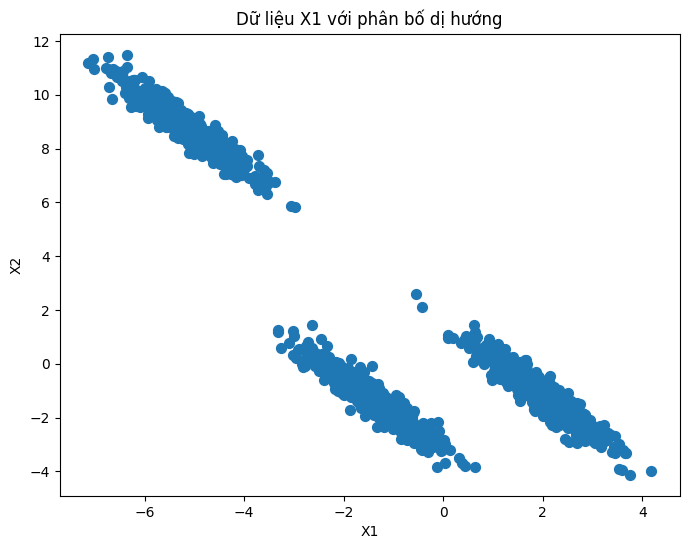

In [68]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Tạo dữ liệu với make_blobs
X, _ = make_blobs(n_samples=1500, centers=3, random_state=42)

# Ma trận A
A = np.array([[0.6, -0.6], [-0.4, 0.8]])

# Tạo ma trận X1
X1 = np.dot(X, A)

# Trực quan hóa dữ liệu X1
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], s=50)
plt.title('Dữ liệu X1 với phân bố dị hướng')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


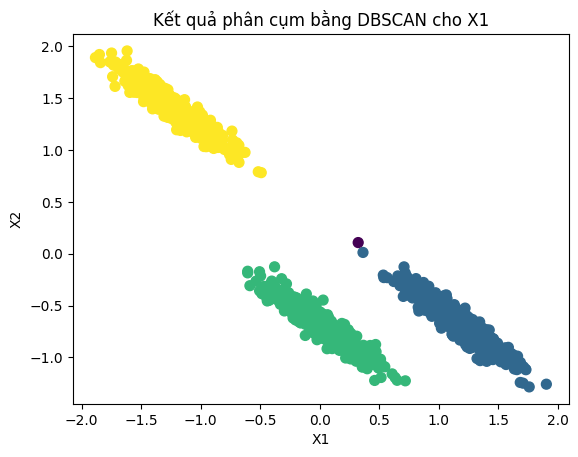

In [69]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X1_scaled)

# Trực quan hoá kết quả phân cụm bằng DBSCAN
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title('Kết quả phân cụm bằng DBSCAN cho X1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


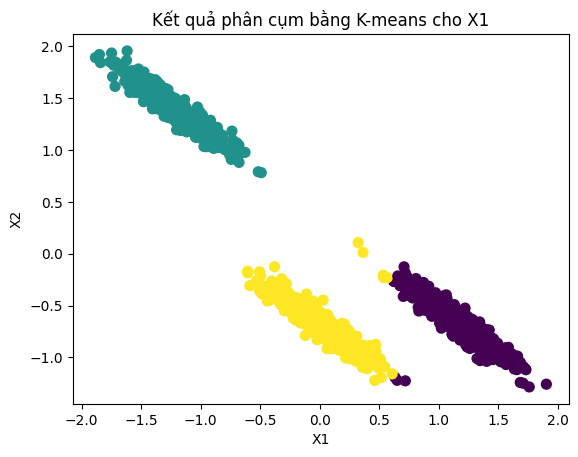

In [70]:
# Phân cụm bằng K-means với k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X1_scaled)

# Trực quan hoá kết quả phân cụm bằng K-means
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.title('Kết quả phân cụm bằng K-means cho X1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


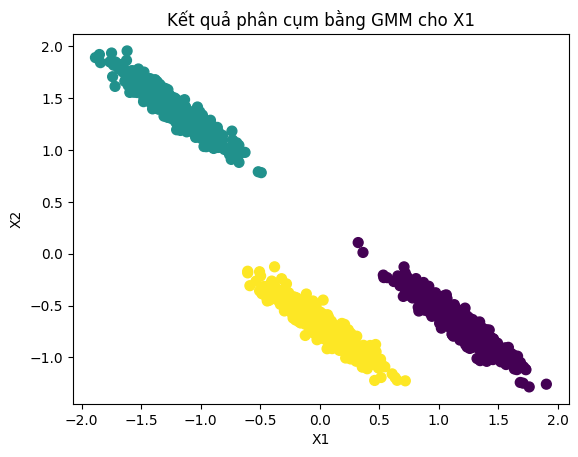

In [71]:
# Phân cụm bằng GMM với số cụm k=3
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X1_scaled)

# Trực quan hoá kết quả phân cụm bằng GMM
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.title('Kết quả phân cụm bằng GMM cho X1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


<center> Nhận xét </center>

- DBSCAN: Ta có thể thấy dữ liệu được chia thành 3 cụm rõ ràng, nhưng các điểm ở gần biên bị lầm thành điểm nhiễu.
- K-means: Trong trường hợp trên việc dùng K-means không thật sự phân rõ cụm, việc 2 cụm gần nhau làm cho việc phân cụm không chính xác.
- GMM: Có vẻ như GMM vẫn là sự lựa chọn tối ưu trong việc phân cụm dữ liệu trên, nó không bỏ xót điểm nhiễu cũng như là không bị lẫn cụm.

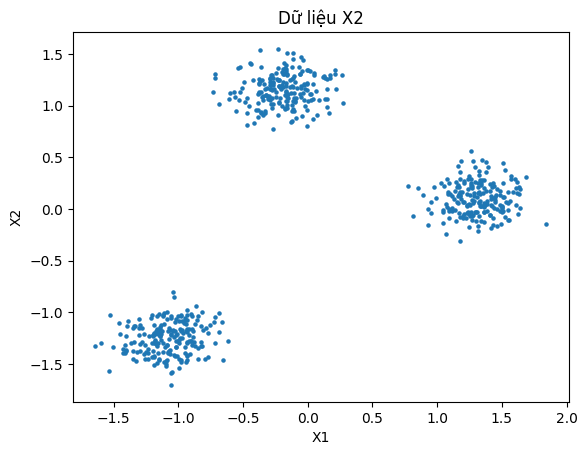

In [72]:
# Lấy 500 điểm từ cụm 0, 100 điểm từ cụm 1 và 10 điểm từ cụm 2
indices = np.random.permutation(np.arange(1500))
X2 = np.vstack([X[indices[:500]], X[indices[500:600]], X[indices[600:610]]])

# Chuẩn hóa dữ liệu
X2_scaled = scaler.fit_transform(X2)

# Trực quan hóa dữ liệu X2
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], s=5)
plt.title('Dữ liệu X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


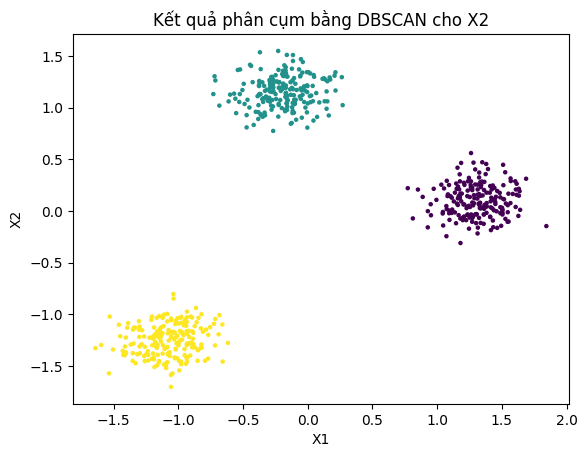

In [73]:
# Phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X2_scaled)

# Trực quan hoá kết quả phân cụm bằng DBSCAN
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng DBSCAN cho X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


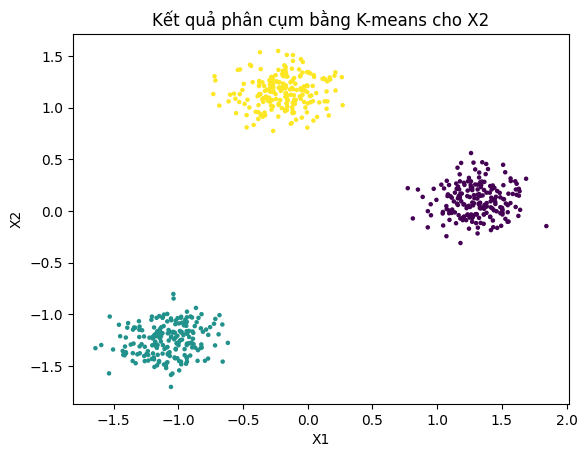

In [74]:
# Phân cụm bằng K-means với k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X2_scaled)

# Trực quan hoá kết quả phân cụm bằng K-means
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng K-means cho X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


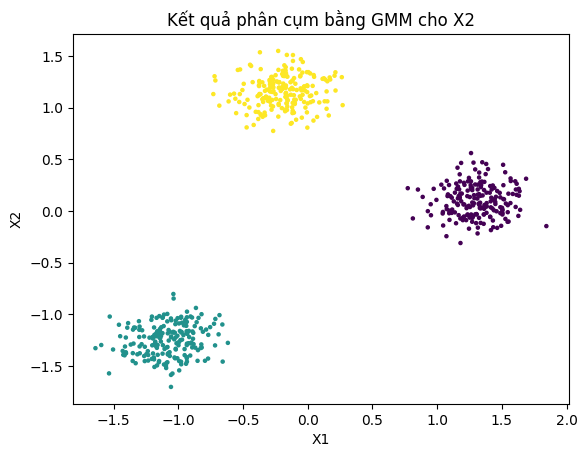

In [75]:
# Phân cụm bằng GMM với số cụm k=3
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X2_scaled)

# Trực quan hoá kết quả phân cụm bằng GMM
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=labels_gmm, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng GMM cho X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


<center> Nhận xét </center>

- Ta có thể thấy cả 3 phương pháp điều thực hiện khá tốt cho dữ liệu trên, không bị nhiễu và không bị sai lệch về cụm.

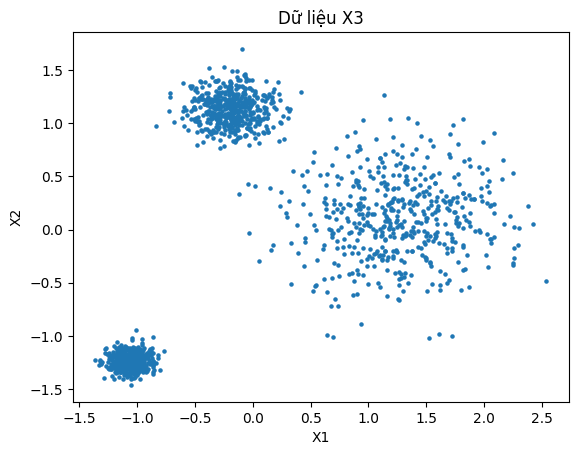

In [76]:
# Tạo dữ liệu với độ lệch chuẩn khác nhau
X3, _ = make_blobs(n_samples=1500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Chuẩn hóa dữ liệu
X3_scaled = scaler.fit_transform(X3)

# Trực quan hóa dữ liệu X3
plt.scatter(X3_scaled[:, 0], X3_scaled[:, 1], s=5)
plt.title('Dữ liệu X3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


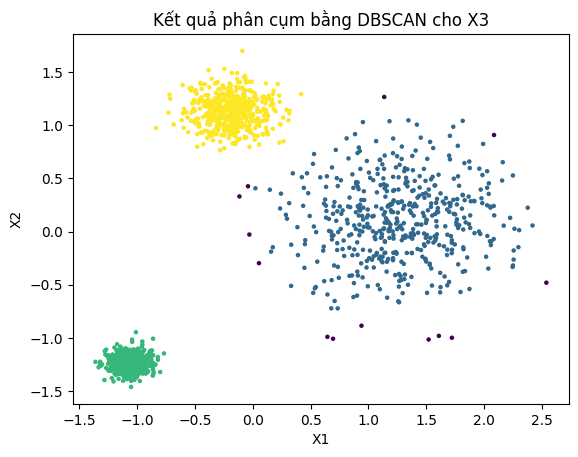

In [77]:
# Phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=10)
labels_dbscan = dbscan.fit_predict(X3_scaled)

# Trực quan hoá kết quả phân cụm bằng DBSCAN
plt.scatter(X3_scaled[:, 0], X3_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng DBSCAN cho X3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


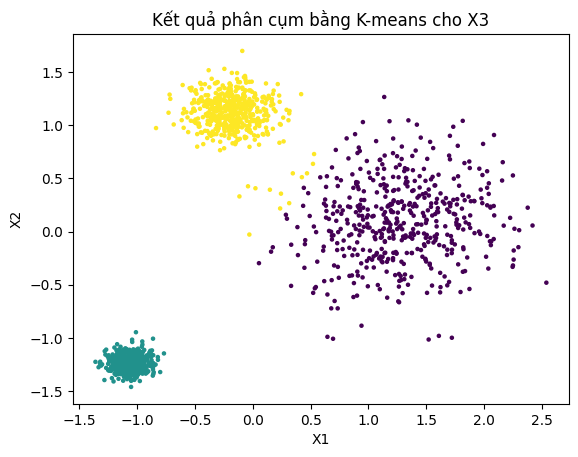

In [78]:
# Phân cụm bằng K-means với k=3
kmeans = KMeans(n_clusters=3, random_state=42,n_init= 10)
labels_kmeans = kmeans.fit_predict(X3_scaled)

# Trực quan hoá kết quả phân cụm bằng K-means
plt.scatter(X3_scaled[:, 0], X3_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng K-means cho X3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


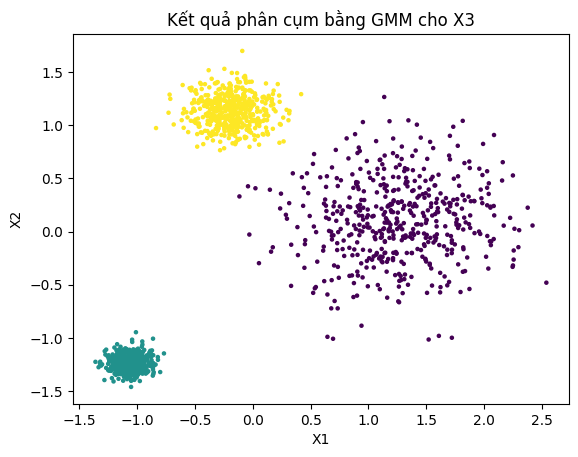

In [79]:
# Phân cụm bằng GMM với số cụm k=3
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X3_scaled)

# Trực quan hoá kết quả phân cụm bằng GMM
plt.scatter(X3_scaled[:, 0], X3_scaled[:, 1], c=labels_gmm, cmap='viridis', s=5)
plt.title('Kết quả phân cụm bằng GMM cho X3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


<center> Nhận xét: </center>

- DBSCAN: Với cụm có mật độ gần nhau, ta thấy việc phân cụm khá tốt, còn ở cụm có mật độ thưa thớt thì việc lầm lẫn điểm nhiễu diễn ra khá nhiều, làm xót dữ liệu
- K-means: Ta thấy việc khác nhau ở mật độ làm cho những dữ liệu thuộc cụm mật độ thưa bị lầm lẫn với dữ liệu thuộc cụm khác làm cho việc phân cụm không được rõ ràng.
- GMM: Linh hoạt hơn K-means, cho phép các cụm có hình dạng và kích thước khác nhau, nhưng vẫn gặp khó khăn với các cụm có độ lệch chuẩn lớn. Tuy vậy với trường hợp trên GMM vẫn làm tốt nhất.